In [16]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Bose Hubbard Model
t = 1              # hopping strength
U =  200000          # Potential interaction
mu = 3              # Chemical Potential
N = 3              # Number of Bosons
M = 6               # Number of Lattice Sites

# Create the Hamiltonian in parts
# Chemical Potential Term
h_mu = sum([tensor([num(N) if i==j else qeye(N) for j in range(M)]) for i in range(M)])

# Interaction Term
site_num_ops = [tensor([num(N) if i==j else qeye(N) for j in range(M)]) for i in range(M)]
h_U = sum([site_num_ops[i]*(site_num_ops[i]-tensor([qeye(N) for j in range(M)])) for i in range(M)])

# Hopping Term
create_ops = [tensor([create(N) if i==j else qeye(N) for j in range(M)]) for i in range(M)]
destroy_ops = [tensor([destroy(N) if i==j else qeye(N) for j in range(M)]) for i in range(M)]
site_hop_ops = [create_ops[i]*destroy_ops[(i+1)%M] + destroy_ops[i]*create_ops[(i+1)%M] for i in range(M)]
h_t =sum(site_hop_ops)

#Intermediate Regime 
def H(t,U,mu):
     return -t*h_t -(U/2)*h_U - mu*h_mu

In [17]:
# Density of states at each site
num_of_bosons_at_site1 = tensor([num(N) if i==0 else qeye(N) for i in range(M)])
num_of_bosons_at_site2 = tensor([num(N) if i==1 else qeye(N) for i in range(M)])
num_of_bosons_at_site3 = tensor([num(N) if i==2 else qeye(N) for i in range(M)])
num_of_bosons_at_site4 = tensor([num(N) if i==3 else qeye(N) for i in range(M)])
num_of_bosons_at_site5 = tensor([num(N) if i==4 else qeye(N) for i in range(M)])
num_of_bosons_at_site6 = tensor([num(N) if i==5 else qeye(N) for i in range(M)])

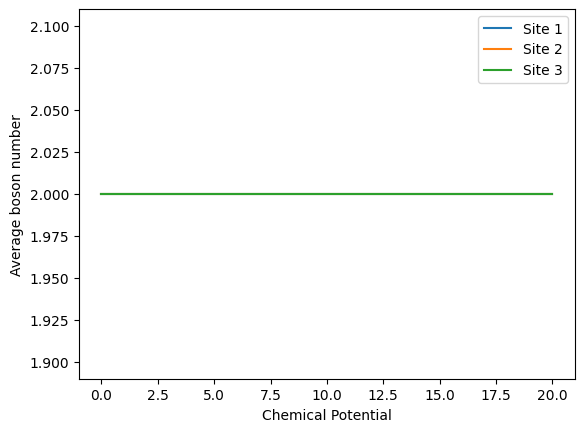

In [18]:
#Variation of average boson number with chemical potential
mu_list = np.linspace(0,20,50)
n1 = [expect(num_of_bosons_at_site1, H(t,U,mu).groundstate()[1]) for mu in mu_list]
n2 = [expect(num_of_bosons_at_site2, H(t,U,mu).groundstate()[1]) for mu in mu_list]
n3 = [expect(num_of_bosons_at_site3, H(t,U,mu).groundstate()[1]) for mu in mu_list]
#n4 = [expect(num_of_bosons_at_site4, H(t,U,mu).groundstate()[1]) for mu in mu_list]
#n5 = [expect(num_of_bosons_at_site5, H(t,U,mu).groundstate()[1]) for mu in mu_list]
#n6 = [expect(num_of_bosons_at_site6, H(t,U,mu).groundstate()[1]) for mu in mu_list]
plt.plot(mu_list,n1,label='Site 1')
plt.plot(mu_list,n2,label='Site 2')
plt.plot(mu_list,n3,label='Site 3')
#plt.plot(mu_list,n4,label='Site 4')
#plt.plot(mu_list,n5,label='Site 5')
#plt.plot(mu_list,n6,label='Site 6')
plt.xlabel('Chemical Potential')
plt.ylabel('Average boson number')
plt.legend()
plt.show()